/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


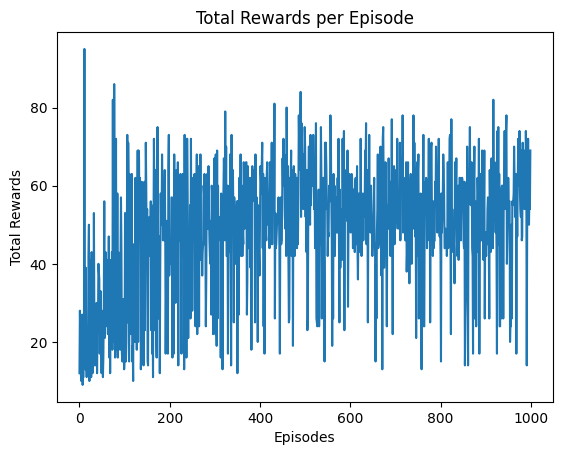

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


52.0

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.95
exploration_rate = 1.0
exploration_decay = 0.99
min_exploration_rate = 0.01
num_episodes = 1000

# Initialize Q-table
state_bins = [np.linspace(-4.8, 4.8, 20),  # Cart Position
              np.linspace(-5, 5, 20),    # Cart Velocity
              np.linspace(-0.418, 0.418, 20),  # Pole Angle
              np.linspace(-5, 5, 20)]    # Pole Velocity
q_table = np.zeros(tuple(len(bins) + 1 for bins in state_bins) + (env.action_space.n,))

def discretize_state(state):
    """Convert continuous state to discrete state."""
    state_indices = []
    for i, bin_edges in enumerate(state_bins):
        state_indices.append(np.digitize(state[i], bin_edges))
    return tuple(state_indices)

def train_agent():
    global exploration_rate
    rewards = []

    for episode in range(num_episodes):
        state = discretize_state(env.reset())
        total_reward = 0
        done = False

        while not done:
            if random.uniform(0, 1) < exploration_rate:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit

            # Take action and observe new state and reward
            new_state, reward, done, _ = env.step(action)
            new_state = discretize_state(new_state)
            total_reward += reward

            # Update Q-value
            best_future_q = np.max(q_table[new_state])
            q_table[state + (action,)] += learning_rate * (reward + discount_factor * best_future_q - q_table[state + (action,)])

            state = new_state

        rewards.append(total_reward)

        # Decay exploration rate
        if exploration_rate > min_exploration_rate:
            exploration_rate *= exploration_decay

    return rewards

# Train the agent
rewards = train_agent()

# Plot the rewards over episodes
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Rewards per Episode')
plt.show()

# Function to test the learned policy
def test_agent():
    state = discretize_state(env.reset())
    done = False
    total_reward = 0

    while not done:
        env.render()
        action = np.argmax(q_table[state])
        new_state, reward, done, _ = env.step(action)
        state = discretize_state(new_state)
        total_reward += reward

    env.close()
    return total_reward

# Test the trained agent
test_reward = test_agent()
test_reward
